# DMT-Assignment01-Task01-Preprocess

## Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
# read data from file
dataset = pd.read_csv("dataset_mood_smartphone.csv")
dataset

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [3]:
# because "Unnamed" seems useless, get rid of it from dataset
dataset = dataset.drop("Unnamed: 0", 1)
dataset

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
376907,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


Text(0, 0.5, 'Data points')

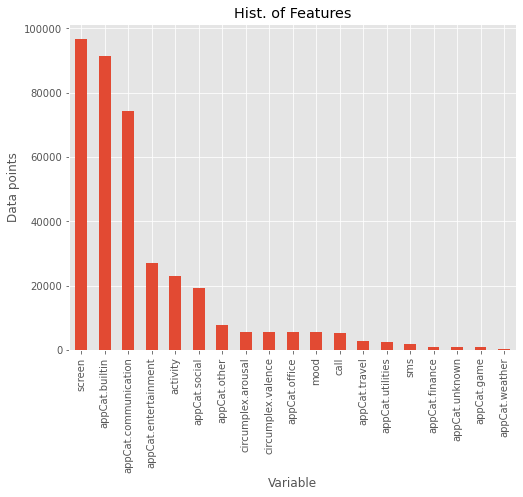

In [4]:
# visualized the dataset by counting variables
hist = pd.DataFrame(dataset.variable.value_counts()).plot(kind='bar', title="Hist. of Features", \
                                                       legend=None, figsize=(8,6))
hist.set_xlabel("Variable")
hist.set_ylabel("Data points")

In [5]:
# label ids
ids = dataset.id.unique()
ids

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

Text(0, 0.5, 'Data points')

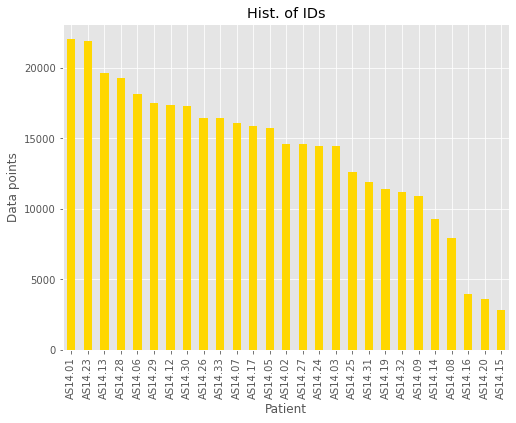

In [6]:
# visualized dataset by counting ids
hist2 = pd.DataFrame(dataset.id.value_counts()).plot(kind="bar", title="Hist. of IDs", \
                                                     legend=None, figsize=(8,6) ,color="gold")
hist2.set_xlabel("Patient")
hist2.set_ylabel("Data points")

In [7]:
# label time
dataset["time"] = pd.to_datetime(dataset["time"])
dataset["time"] = dataset["time"].dt.normalize()
dataset.time

0        2014-02-26
1        2014-02-26
2        2014-02-26
3        2014-02-26
4        2014-02-27
            ...    
376907   2014-04-11
376908   2014-04-19
376909   2014-04-26
376910   2014-04-27
376911   2014-04-07
Name: time, Length: 376912, dtype: datetime64[ns]

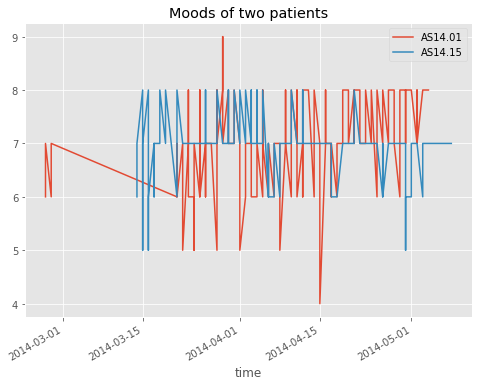

In [8]:
# visualized two patients' mood over time
fig, ax = plt.subplots()
for f, a in dataset[(dataset.id.isin(["AS14.01","AS14.15"])) \
                    & (dataset.variable=="mood")].groupby(["id"]):
    ax = a.plot(ax=ax, kind="line", x="time", y="value", label=f, \
                title="Moods of two patients", figsize=(8,6))
plt.show()

## Preprocessing

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c252a2310>,
      dtype=object)

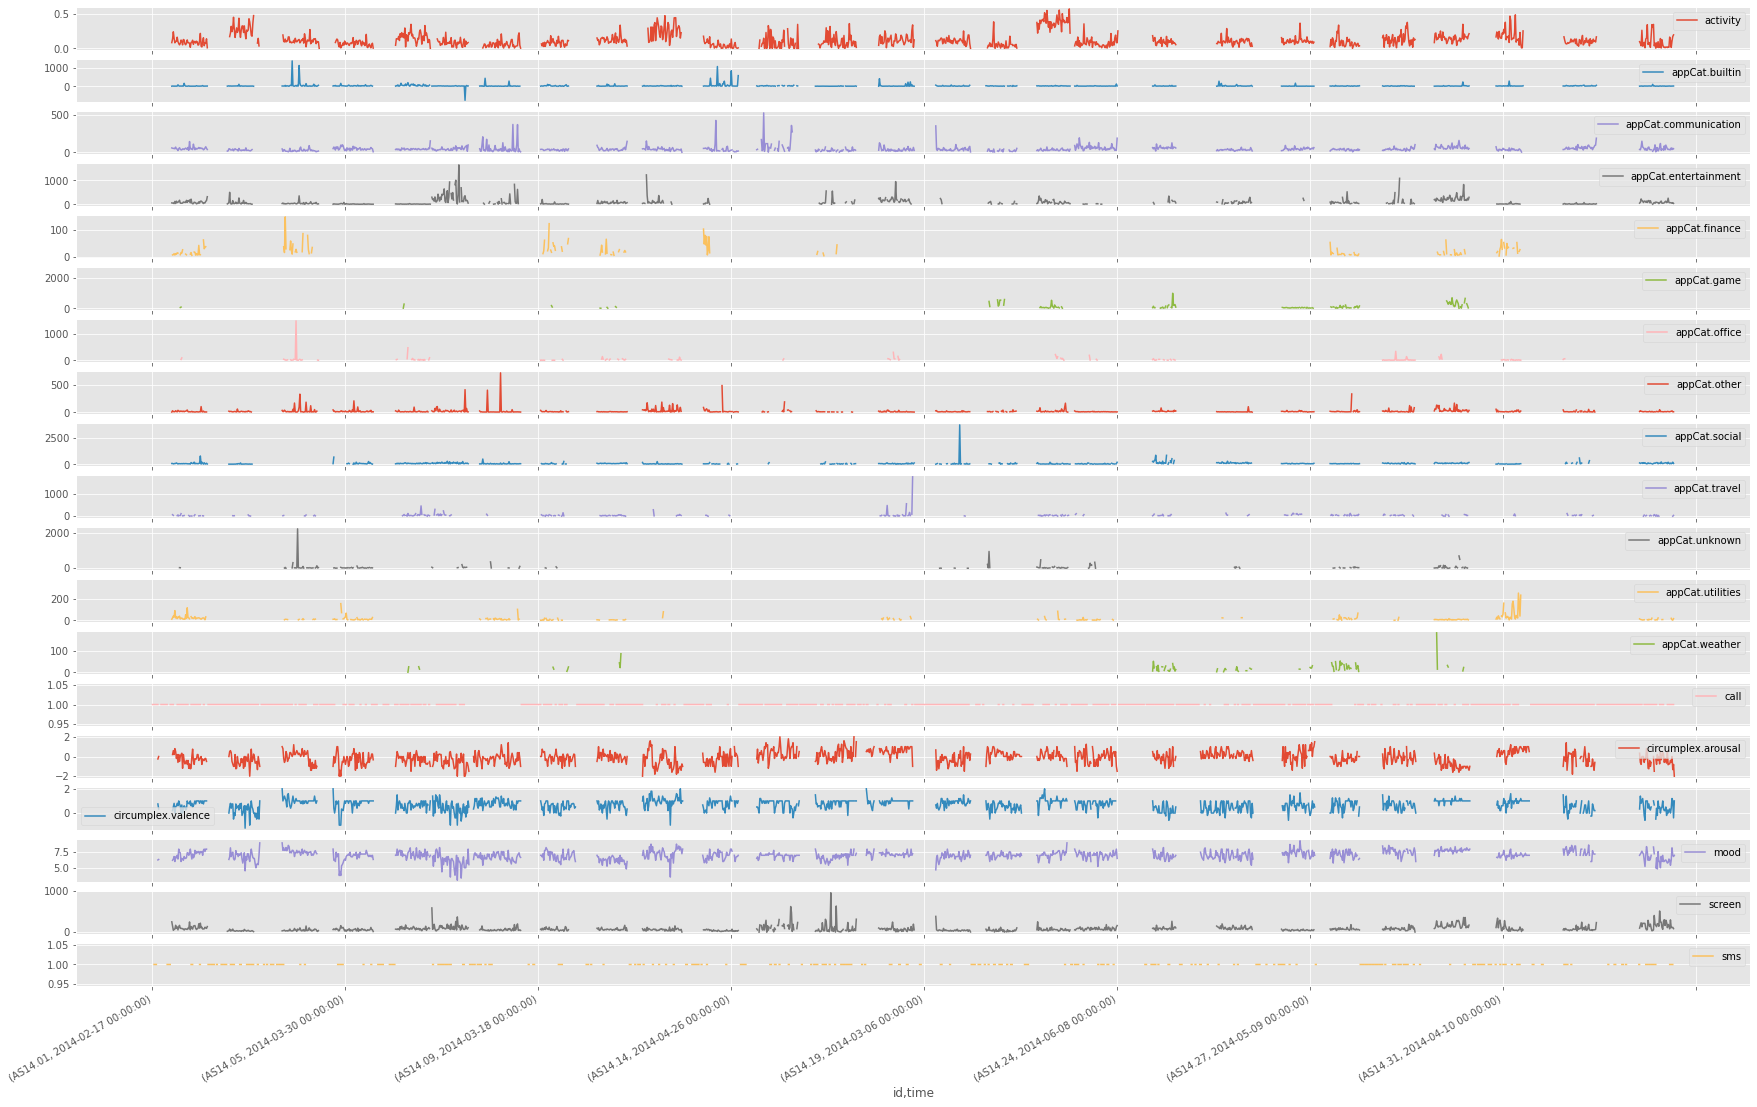

In [14]:
# create an empty dataset which is labeled by ID and time
prodataset = dataset.pivot_table(index=["id","time"], columns="variable",values="value")
prodataset.plot(subplots=True, figsize=(30,20))

In [15]:
prodataset

variable            activity  appCat.builtin  appCat.communication  \
id      time                                                         
AS14.01 2014-02-17       NaN             NaN                   NaN   
        2014-02-18       NaN             NaN                   NaN   
        2014-02-19       NaN             NaN                   NaN   
        2014-02-20       NaN             NaN                   NaN   
        2014-02-21       NaN             NaN                   NaN   
...                      ...             ...                   ...   
AS14.33 2014-05-27  0.012704        8.545776             59.382943   
        2014-05-28  0.103301        9.590398             37.238750   
        2014-05-29  0.169354        6.452161             54.388125   
        2014-05-30  0.192901       14.776845             46.412278   
        2014-05-31       NaN             NaN                   NaN   

variable            appCat.entertainment  appCat.finance  appCat.game  \
id      time                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   
        2014-02-19                   NaN             NaN          NaN   
        2014-02-20                   NaN             NaN          NaN   
        2014-02-21                   NaN             NaN          NaN   
...                                  ...             ...          ...   
AS14.33 2014-05-27             62.347000             NaN          NaN   
        2014-05-28             43.907571             NaN          NaN   
        2014-05-29             68.369000             NaN          NaN   
        2014-05-30             37.174286             NaN          NaN   
        2014-05-31                   NaN             NaN          NaN   

variable            appCat.office  appCat.other  appCat.social  appCat.travel  \
id      time                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   
        2014-02-19            NaN           NaN            NaN            NaN   
        2014-02-20            NaN           NaN            NaN            NaN   
        2014-02-21            NaN           NaN            NaN            NaN   
...                           ...           ...            ...            ...   
AS14.33 2014-05-27            NaN     17.835750      50.259100            NaN   
        2014-05-28      44.738625     27.891895      99.281685            NaN   
        2014-05-29            NaN      9.734000     198.880222       0.939000   
        2014-05-30            NaN     10.522000      75.390690      37.594571   
        2014-05-31            NaN           NaN            NaN            NaN   

variable            appCat.unknown  appCat.utilities  appCat.weather  call  \
id      time                                                                 
AS14.01 2014-02-17             NaN               NaN             NaN   1.0   
        2014-02-18             NaN               NaN             NaN   1.0   
        2014-02-19             NaN               NaN             NaN   1.0   
        2014-02-20             NaN               NaN             NaN   1.0   
        2014-02-21             NaN               NaN             NaN   NaN   
...                            ...               ...             ...   ...   
AS14.33 2014-05-27             NaN         18.724333             NaN   1.0   
        2014-05-28             NaN          5.111000             NaN   1.0   
        2014-05-29             NaN          1.599500             NaN   1.0   
        2014-05-30        2.690667         15.521667             NaN   1.0   
        2014-05-31             NaN               NaN             NaN   NaN   

variable            circumplex.arousal  circumplex.valence  mood      

AttributeError: 'Line2D' object has no property 'ylabel'

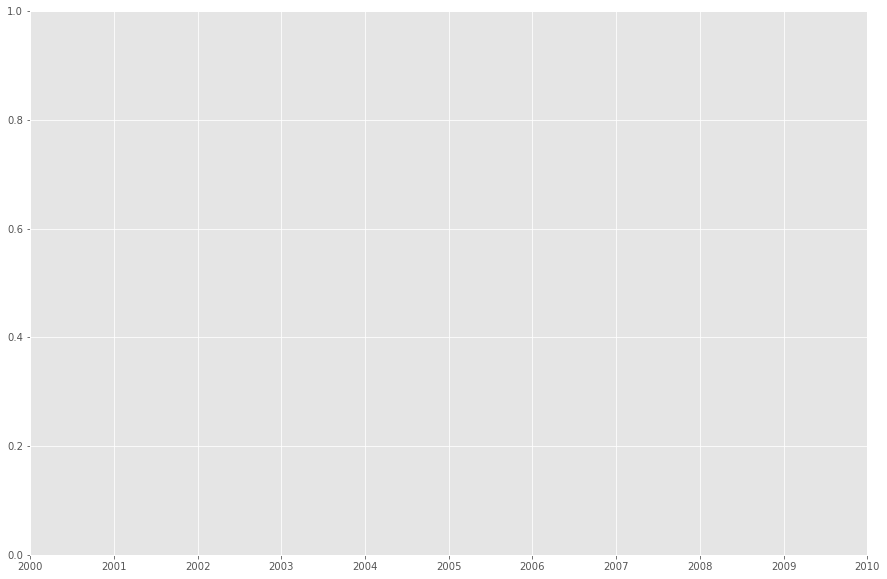

In [11]:
# visualized moods of all patients over the time
plt.rcParams["figure.figsize"] = [15,10]
for patient in prodataset.index.levels[0]:
    prodataset.loc[patient]['mood'].plot(label=patient, title="Moods of all patients", ylabel="Data points")
plt.legend();

In [ ]:
#Checking for outliers, If there are a lot of outliers we can't replace NaN with mean, but we use Median.

prodataset.boxplot(column=['mood'])
plt.show() #mean

prodataset.boxplot(column=['activity'])
plt.show() #median

prodataset.boxplot(column=['appCat.builtin'])
plt.show() #median

prodataset.boxplot(column=['appCat.communication'])
plt.show() #median

prodataset.boxplot(column=['appCat.entertainment'])
plt.show() #median

prodataset.boxplot(column=['appCat.finance'])
plt.show() #median

prodataset.boxplot(column=['appCat.communication'])
plt.show() #median

prodataset.boxplot(column=['appCat.game'])
plt.show() #median

prodataset.boxplot(column=['appCat.office'])
plt.show() #median

prodataset.boxplot(column=['appCat.other'])
plt.show() #median

prodataset.boxplot(column=['appCat.social'])
plt.show() #median

prodataset.boxplot(column=['appCat.travel'])
plt.show() #median

prodataset.boxplot(column=['appCat.utilities'])
plt.show() #median

prodataset.boxplot(column=['appCat.weather'])
plt.show() #mean

In [36]:
#Calculate mood and medians
mood_Mean = prodataset["mood"].mean()
activity_median = prodataset["activity"].median()
built_median = prodataset["appCat.builtin"].median()
comm_median = prodataset["appCat.communication"].median()
finance_median = prodataset["appCat.finance"].median()
ent_median = prodataset["appCat.entertainment"].median()
game_median = prodataset["appCat.game"].median()
office_median = prodataset["appCat.office"].median()
other_median = prodataset["appCat.other"].median()
social_median = prodataset["appCat.social"].median()
travel_median = prodataset["appCat.travel"].median()
utilities_median = prodataset["appCat.utilities"].median()
weather_median = prodataset["appCat.weather"].median()
arousal_mean = prodataset["circumplex.arousal"].mean()
valence_mean = prodataset["circumplex.valence"].mean()
uknown_median = prodataset["appCat.unknown"].median()
screen_median = prodataset["screen"].median()
sms_mean = prodataset["sms"].mean()
call_mean = prodataset["call"].mean()
#Replacing NULL values 
prodataset["mood"].replace(np.nan,mood_Mean,inplace=True)
prodataset["activity"].replace(np.nan,activity_median,inplace=True)
prodataset["appCat.builtin"].replace(np.nan,built_median,inplace=True)
prodataset["appCat.communication"].replace(np.nan,comm_median,inplace=True)
prodataset["appCat.entertainment"].replace(np.nan,ent_median,inplace=True)
prodataset["appCat.game"].replace(np.nan,game_median,inplace=True)
prodataset["appCat.office"].replace(np.nan,office_median,inplace=True)
prodataset["appCat.travel"].replace(np.nan,travel_median,inplace=True)
prodataset["appCat.other"].replace(np.nan,other_median,inplace=True)
prodataset["appCat.social"].replace(np.nan,social_median,inplace=True)
prodataset["appCat.utilities"].replace(np.nan,utilities_median,inplace=True)
prodataset["appCat.weather"].replace(np.nan,weather_median,inplace=True)
prodataset["circumplex.arousal"].replace(np.nan,arousal_mean,inplace=True)
prodataset["circumplex.valence"].replace(np.nan,valence_mean,inplace=True)
prodataset["appCat.finance"].replace(np.nan,finance_median,inplace=True)
prodataset["appCat.unknown"].replace(np.nan,uknown_median,inplace=True)
prodataset["call"].replace(np.nan,call_mean,inplace=True)
prodataset["sms"].replace(np.nan,sms_mean,inplace=True)
prodataset["screen"].replace(np.nan,screen_median,inplace=True)

In [37]:
prodataset.head()

variable            activity  appCat.builtin  appCat.communication  \
id      time                                                         
AS14.01 2014-02-17 -0.248004       -0.158701             -0.187059   
        2014-02-18 -0.248004       -0.158701             -0.187059   
        2014-02-19 -0.248004       -0.158701             -0.187059   
        2014-02-20 -0.248004       -0.158701             -0.187059   
        2014-02-21 -0.248004       -0.158701             -0.187059   

variable            appCat.entertainment  appCat.finance  appCat.game  \
id      time                                                            
AS14.01 2014-02-17             -0.319857       -0.345511    -0.376109   
        2014-02-18             -0.319857       -0.345511    -0.376109   
        2014-02-19             -0.319857       -0.345511    -0.376109   
        2014-02-20             -0.319857       -0.345511    -0.376109   
        2014-02-21             -0.319857       -0.345511    -0.376109   

variable            appCat.office  appCat.other  appCat.social  appCat.travel  \
id      time                                                                    
AS14.01 2014-02-17      -0.242437     -0.232853      -0.162278      -0.150806   
        2014-02-18      -0.242437     -0.232853      -0.162278      -0.150806   
        2014-02-19      -0.242437     -0.232853      -0.162278      -0.150806   
        2014-02-20      -0.242437     -0.232853      -0.162278      -0.150806   
        2014-02-21      -0.242437     -0.232853      -0.162278      -0.150806   

variable            appCat.unknown  appCat.utilities  appCat.weather  call  \
id      time                                                                 
AS14.01 2014-02-17       -0.221082         -0.263542       -0.230338   0.0   
        2014-02-18       -0.221082         -0.263542       -0.230338   0.0   
        2014-02-19       -0.221082         -0.263542       -0.230338   0.0   
        2014-02-20       -0.221082         -0.263542       -0.230338   0.0   
        2014-02-21       -0.221082         -0.263542       -0.230338   0.0   

variable            circumplex.arousal  circumplex.valence          mood  \
id      time                                                               
AS14.01 2014-02-17       -2.311505e-17       -2.765034e-16  2.814589e-16   
        2014-02-18       -2.311505e-17       -2.765034e-16  2.814589e-16   
        2014-02-19       -2.311505e-17       -2.765034e-16  2.814589e-16   
        2014-02-20       -2.311505e-17       -2.765034e-16  2.814589e-16   
        2014-02-21       -2.311505e-17       -2.765034e-16  2.814589e-16   

variable              screen  sms  
id      time                       
AS14.01 2014-02-17 -0.266775  0.0  
        2014-02-18 -0.266775  0.0  
        2014-02-19 -0.266775  0.0  
        2014-02-20 -0.266775  0.0  
        2014-02-21 -0.266775  0.0

In [ ]:
prodataset.to_csv("dataset_clean.csv")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c23b1ec70>,
      dtype=object)

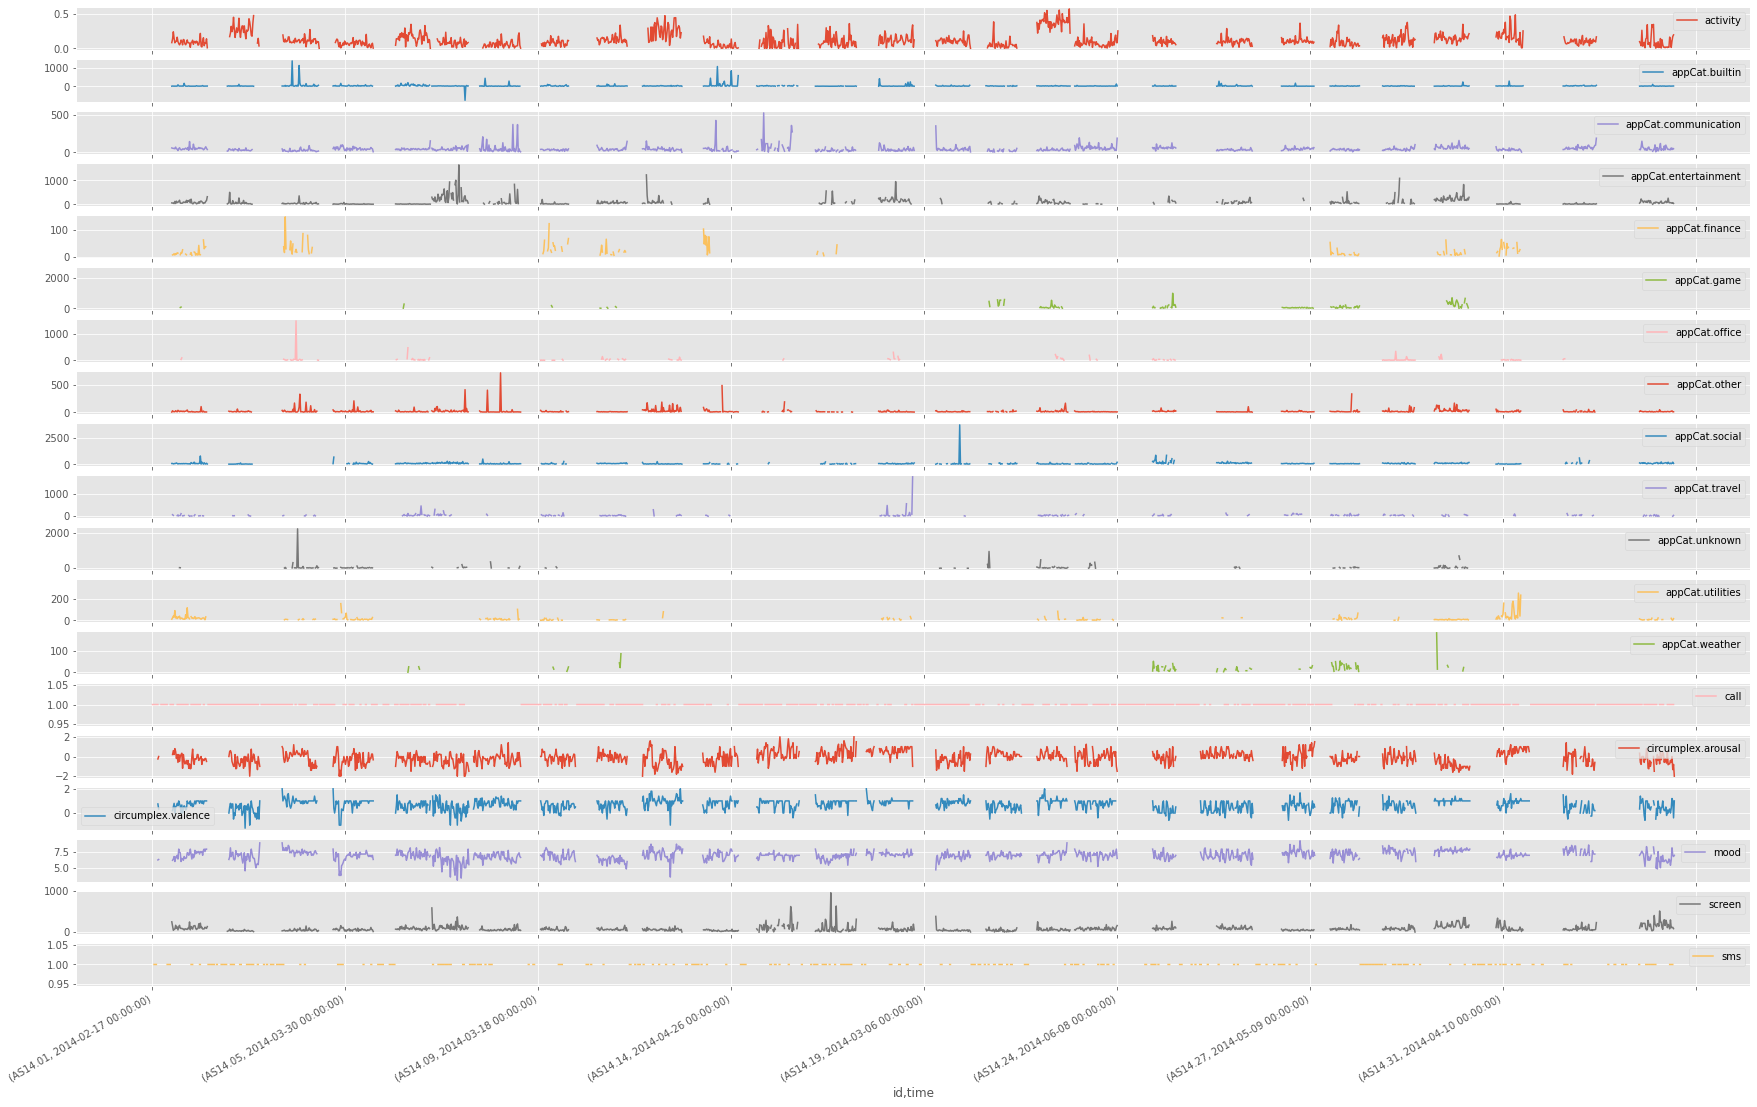

In [12]:
prodataset.plot(subplots=True, figsize=(30,20))

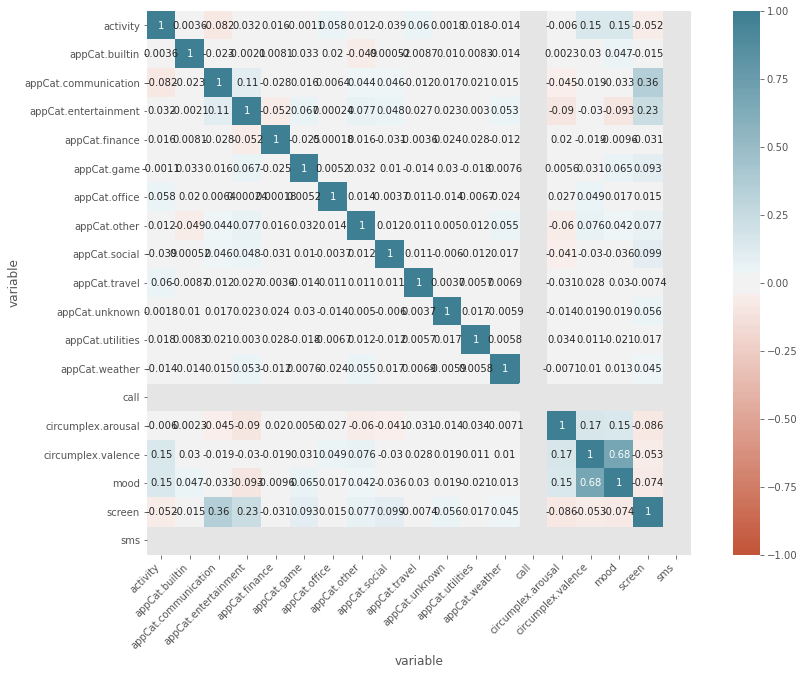

In [38]:
#Find correlation between variables

import seaborn as sns
corr = prodataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

prodataset["mood"].replace(np.nan,mood_Mean,inplace=True)
prodataset["activity"].replace(np.nan,activity_median,inplace=True)
prodataset["appCat.builtin"].replace(np.nan,built_median,inplace=True)
prodataset["appCat.communication"].replace(np.nan,comm_median,inplace=True)
prodataset["appCat.entertainment"].replace(np.nan,ent_median,inplace=True)
prodataset["appCat.game"].replace(np.nan,game_median,inplace=True)
prodataset["appCat.office"].replace(np.nan,office_median,inplace=True)
prodataset["appCat.travel"].replace(np.nan,travel_median,inplace=True)
prodataset["appCat.other"].replace(np.nan,other_median,inplace=True)
prodataset["appCat.social"].replace(np.nan,social_median,inplace=True)
prodataset["appCat.utilities"].replace(np.nan,utilities_median,inplace=True)
prodataset["appCat.weather"].replace(np.nan,weather_median,inplace=True)
prodataset["circumplex.arousal"].replace(np.nan,arousal_mean,inplace=True)
prodataset["circumplex.valence"].replace(np.nan,valence_mean,inplace=True)
prodataset["appCat.finance"].replace(np.nan,finance_median,inplace=True)
prodataset["appCat.unknown"].replace(np.nan,uknown_median,inplace=True)
prodataset["call"].replace(np.nan,call_mean,inplace=True)
prodataset["sms"].replace(np.nan,sms_mean,inplace=True)
prodataset["screen"].replace(np.nan,screen_median,inplace=True)


## NEED TO GROUP MOOD AND VALENCE???

In [39]:
##normalize/scale data

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

prodataset["mood"] = std_scale.fit_transform(prodataset[["mood"]])
prodataset["activity"] = std_scale.fit_transform(prodataset[["activity"]])
prodataset["appCat.builtin"] = std_scale.fit_transform(prodataset[["appCat.builtin"]])
prodataset["appCat.communication"] = std_scale.fit_transform(prodataset[["appCat.communication"]])
prodataset["appCat.entertainment"] = std_scale.fit_transform(prodataset[["appCat.entertainment"]])
prodataset["appCat.game"] = std_scale.fit_transform(prodataset[["appCat.game"]])
prodataset["appCat.office"] = std_scale.fit_transform(prodataset[["appCat.office"]])
prodataset["appCat.travel"] = std_scale.fit_transform(prodataset[["appCat.travel"]])
prodataset["appCat.other"] = std_scale.fit_transform(prodataset[["appCat.other"]])
prodataset["appCat.social"] = std_scale.fit_transform(prodataset[["appCat.social"]])
prodataset["appCat.utilities"] = std_scale.fit_transform(prodataset[["appCat.utilities"]])
prodataset["appCat.weather"] = std_scale.fit_transform(prodataset[["appCat.weather"]])
prodataset["circumplex.arousal"] = std_scale.fit_transform(prodataset[["circumplex.arousal"]])
prodataset["circumplex.valence"] = std_scale.fit_transform(prodataset[["circumplex.valence"]])
prodataset["appCat.finance"] = std_scale.fit_transform(prodataset[["appCat.finance"]])
prodataset["appCat.unknown"] = std_scale.fit_transform(prodataset[["appCat.unknown"]])
prodataset["call"] = std_scale.fit_transform(prodataset[["call"]])
prodataset["sms"] = std_scale.fit_transform(prodataset[["sms"]])
prodataset["screen"] = std_scale.fit_transform(prodataset[["screen"]])

prodataset.head()

variable            activity  appCat.builtin  appCat.communication  \
id      time                                                         
AS14.01 2014-02-17 -0.190131       -0.122901             -0.143842   
        2014-02-18 -0.190131       -0.122901             -0.143842   
        2014-02-19 -0.190131       -0.122901             -0.143842   
        2014-02-20 -0.190131       -0.122901             -0.143842   
        2014-02-21 -0.190131       -0.122901             -0.143842   

variable            appCat.entertainment  appCat.finance  appCat.game  \
id      time                                                            
AS14.01 2014-02-17             -0.204085       -0.106375    -0.110776   
        2014-02-18             -0.204085       -0.106375    -0.110776   
        2014-02-19             -0.204085       -0.106375    -0.110776   
        2014-02-20             -0.204085       -0.106375    -0.110776   
        2014-02-21             -0.204085       -0.106375    -0.110776   

variable            appCat.office  appCat.other  appCat.social  appCat.travel  \
id      time                                                                    
AS14.01 2014-02-17      -0.088467     -0.173419      -0.114087      -0.069703   
        2014-02-18      -0.088467     -0.173419      -0.114087      -0.069703   
        2014-02-19      -0.088467     -0.173419      -0.114087      -0.069703   
        2014-02-20      -0.088467     -0.173419      -0.114087      -0.069703   
        2014-02-21      -0.088467     -0.173419      -0.114087      -0.069703   

variable            appCat.unknown  appCat.utilities  appCat.weather  call  \
id      time                                                                 
AS14.01 2014-02-17       -0.079211         -0.120245       -0.053795   0.0   
        2014-02-18       -0.079211         -0.120245       -0.053795   0.0   
        2014-02-19       -0.079211         -0.120245       -0.053795   0.0   
        2014-02-20       -0.079211         -0.120245       -0.053795   0.0   
        2014-02-21       -0.079211         -0.120245       -0.053795   0.0   

variable            circumplex.arousal  circumplex.valence          mood  \
id      time                                                               
AS14.01 2014-02-17       -1.086447e-17       -2.237939e-16  2.253064e-16   
        2014-02-18       -1.086447e-17       -2.237939e-16  2.253064e-16   
        2014-02-19       -1.086447e-17       -2.237939e-16  2.253064e-16   
        2014-02-20       -1.086447e-17       -2.237939e-16  2.253064e-16   
        2014-02-21       -1.086447e-17       -2.237939e-16  2.253064e-16   

variable              screen  sms  
id      time                       
AS14.01 2014-02-17 -0.205834  0.0  
        2014-02-18 -0.205834  0.0  
        2014-02-19 -0.205834  0.0  
        2014-02-20 -0.205834  0.0  
        2014-02-21 -0.205834  0.0